In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#loading dataset
credit_risk = pd.read_csv('credit_risk_dataset.csv')

In [3]:
#display first 5 rows of the dataset
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
#displaying last 5 rows of the dataset
credit_risk.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
# displaying number of rows and columns
credit_risk.shape

(32581, 12)

In [6]:
# displaying number of elements in the data
credit_risk.size

390972

In [7]:
# statistics summary of the data
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
#basic information of the data
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
#checking for missing or null values
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Handling missing values

In [10]:
#handling missing values in person_emp_length column
credit_risk['person_emp_length'].fillna(credit_risk['person_emp_length'].median(), inplace=True)

In [11]:
# handling missing values in loan_int_rate column
credit_risk['loan_int_rate'].fillna(credit_risk['loan_int_rate'].median(), inplace=True)

In [12]:
# checking for missing values again
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### EDA

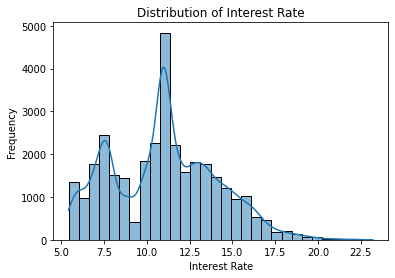

In [13]:
# Plot the histogram for the 'loan interest rate' column
sns.histplot(data=credit_risk, x='loan_int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

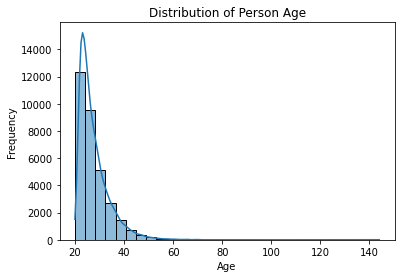

In [14]:
#distribution of person age column
sns.histplot(data=credit_risk, x='person_age', bins=30, kde=True)
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

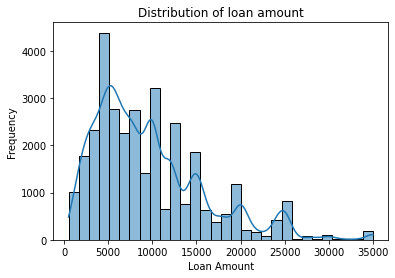

In [15]:
#histogram plot for loan amount column
sns.histplot(data=credit_risk, x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of loan amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

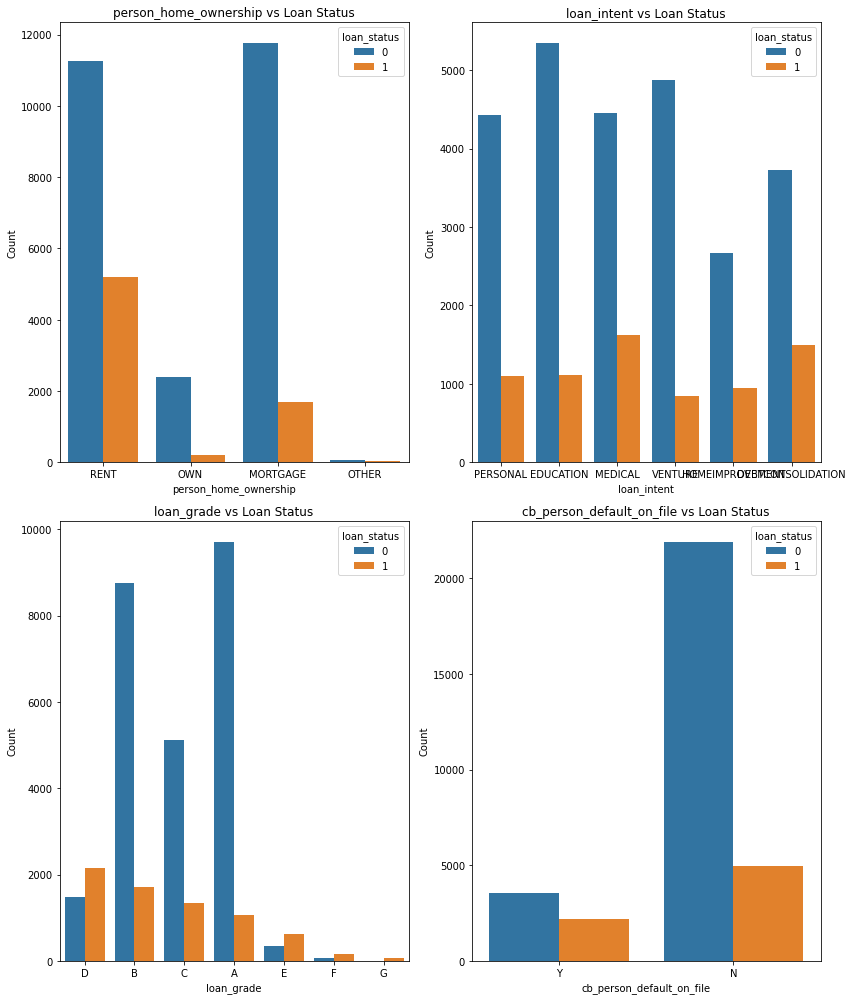

In [16]:
# List of categorical columns based on the dataset description
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Create a grid of subplots for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(12, 14))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable with loan_status as hue
for i, col in enumerate(categorical_columns):
    sns.countplot(data=credit_risk, x=col, hue='loan_status', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

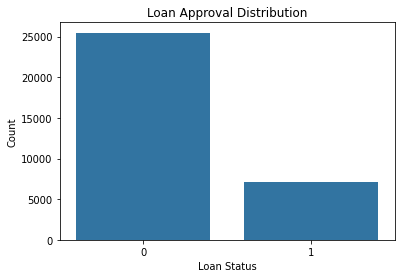

In [17]:
#count plot of target variable loan_status
sns.countplot(data=credit_risk, x='loan_status')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

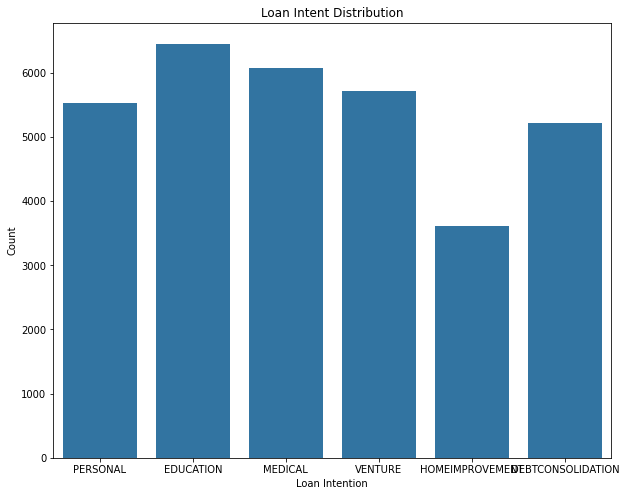

In [18]:
#count plot for the loan intention column
plt.figure(figsize=(10, 8))
sns.countplot(data=credit_risk, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intention')
plt.ylabel('Count')
plt.show()

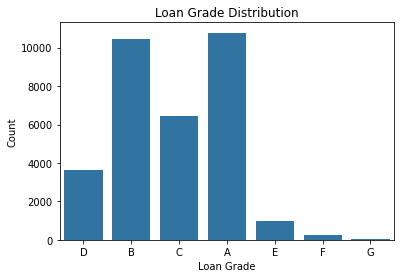

In [19]:
# count plot for loan grade column
sns.countplot(data=credit_risk, x='loan_grade')
plt.title('Loan Grade Distribution')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

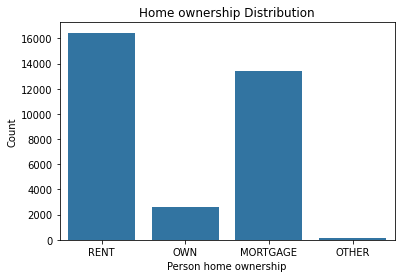

In [20]:
#count plot home ownership column
sns.countplot(data=credit_risk, x='person_home_ownership')
plt.title('Home ownership Distribution')
plt.xlabel('Person home ownership')
plt.ylabel('Count')
plt.show()

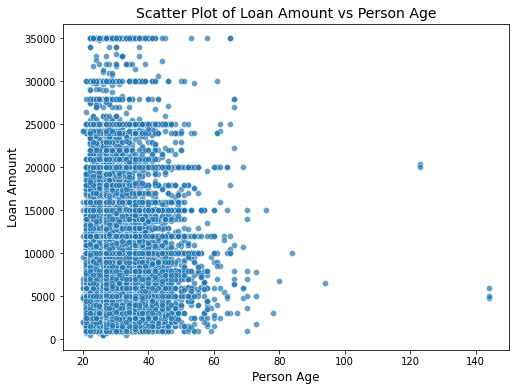

In [21]:
# Scatter plot for two independent variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=credit_risk, x='person_age', y='loan_amnt', alpha=0.7)
# Adding title and labels
plt.title('Scatter Plot of Loan Amount vs Person Age', fontsize=14)
plt.xlabel('Person Age', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
# Show the plot
plt.show()

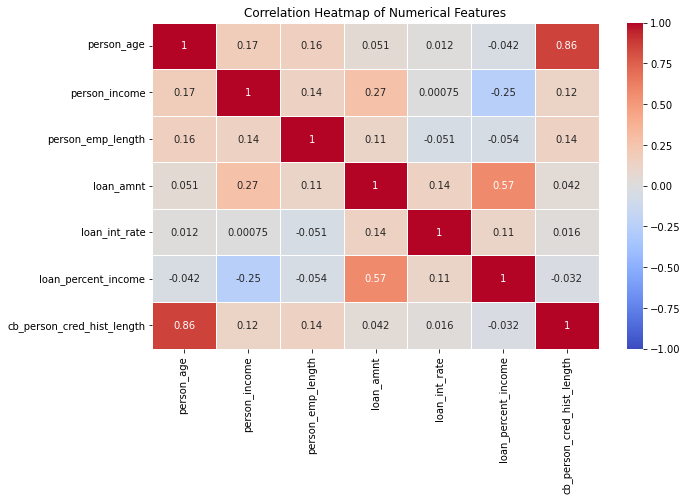

In [22]:
# List of numerical columns based on the dataset description
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
# Calculate the correlation matrix for the numerical columns
correlation_matrix = credit_risk[numerical_columns].corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
# Add title to the heatmap
plt.title('Correlation Heatmap of Numerical Features')
# Show the plot
plt.show()

In [23]:
# Display the number of rows before removing duplicates
print("Original data size:", credit_risk.shape[0])

# Drop duplicate rows
credit_risk_data_cleaned = credit_risk.drop_duplicates()

# Display the number of rows after removing duplicates
print("Data size after removing duplicates:", credit_risk_data_cleaned.shape[0])

Original data size: 32581
Data size after removing duplicates: 32416


### Checking for outliers

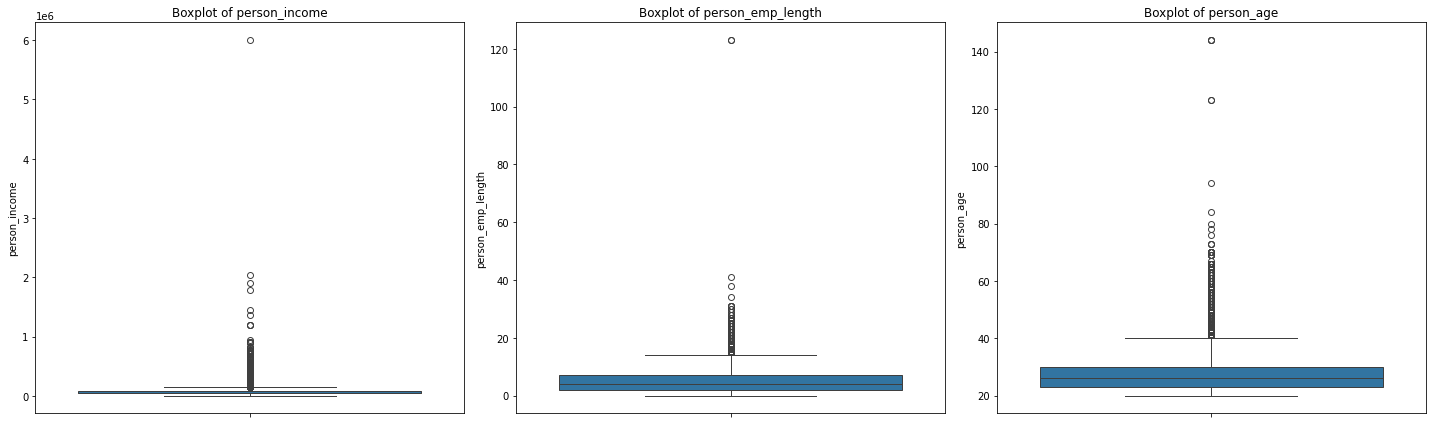

In [24]:
# List of columns to check for outliers
columns_to_check = ['person_income', 'person_emp_length', 'person_age']

# Create a grid of boxplots for each column
fig, axes = plt.subplots(1, len(columns_to_check), figsize=(20, 6))

# Plot boxplots for each column
for i, col in enumerate(columns_to_check):
    sns.boxplot(data=credit_risk_data_cleaned, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [25]:
# List of columns to remove outliers from
columns_to_check = ['loan_int_rate', 'loan_amnt', 'person_income', 'person_emp_length', 'person_age']

# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the specified columns
credit_risk_data = remove_outliers_iqr(credit_risk_data_cleaned, columns_to_check)

# Display the number of rows before and after outlier removal
print("Original data size:", credit_risk_data_cleaned.shape[0])
print("Data size after outlier removal:", credit_risk_data.shape[0])

Original data size: 32416
Data size after outlier removal: 27415


### Encoding categorical columns into numerical values

In [26]:
from sklearn.preprocessing import LabelEncoder

# List of columns for one-hot encoding
one_hot_columns = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Apply one-hot encoding to columns with multiple categories
credit_risk_data_encoded = pd.get_dummies(credit_risk_data, columns=one_hot_columns, drop_first=True)

# Apply label encoding to binary columns
label_encoder = LabelEncoder()
credit_risk_data_encoded['cb_person_default_on_file'] = label_encoder.fit_transform(credit_risk_data_encoded['cb_person_default_on_file'])

# Display the first few rows of the encoded dataset
print(credit_risk_data_encoded.head())

    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1           21           9600                5.0       1000          11.14   
2           25           9600                1.0       5500          12.87   
5           21           9900                2.0       2500           7.14   
9           21          10000                6.0       1600          14.74   
11          21          10000                2.0       4500           8.63   

    loan_status  loan_percent_income  cb_person_default_on_file  \
1             0                 0.10                          0   
2             1                 0.57                          0   
5             1                 0.25                          0   
9             1                 0.16                          0   
11            1                 0.45                          0   

    cb_person_cred_hist_length  person_home_ownership_OTHER  ...  \
1                            2                        False 

In [27]:
# Assuming 'loan_status' is the target variable and all other columns are features
X = credit_risk_data_encoded.drop('loan_status', axis=1)
y = credit_risk_data_encoded['loan_status']
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the features (important for KNN and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN Algorithm

In [29]:
### 1. K-Nearest Neighbors (KNN)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Confusion Matrix:
[[4181  125]
 [ 436  741]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4306
           1       0.86      0.63      0.73      1177

    accuracy                           0.90      5483
   macro avg       0.88      0.80      0.83      5483
weighted avg       0.89      0.90      0.89      5483



### SVM

In [30]:
### 2. Support Vector Machine (SVM)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Confusion Matrix:
[[3653  653]
 [ 307  870]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4306
           1       0.57      0.74      0.64      1177

    accuracy                           0.82      5483
   macro avg       0.75      0.79      0.76      5483
weighted avg       0.85      0.82      0.83      5483



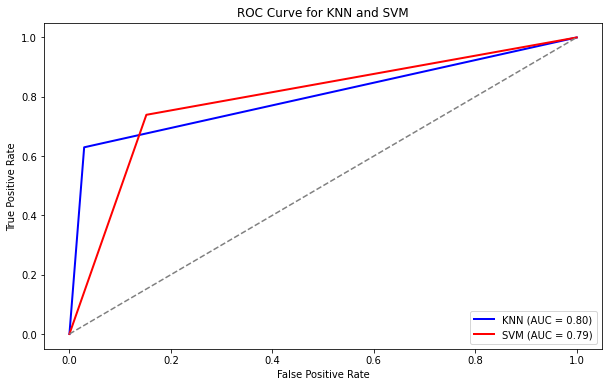

In [31]:
# Calculate ROC Curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate ROC Curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN and SVM')
plt.legend(loc='lower right')
plt.show()

### Applying SMOTE to balance the data

In [32]:
# Assuming 'loan_status' is the target variable and all other columns are features
X = credit_risk_data_encoded.drop('loan_status', axis=1)
y = credit_risk_data_encoded['loan_status']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: loan_status
0    17143
1     4789
Name: count, dtype: int64
Class distribution after SMOTE: loan_status
0    17143
1    17143
Name: count, dtype: int64



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4306
           1       0.76      0.67      0.71      1177

    accuracy                           0.88      5483
   macro avg       0.84      0.81      0.82      5483
weighted avg       0.88      0.88      0.88      5483



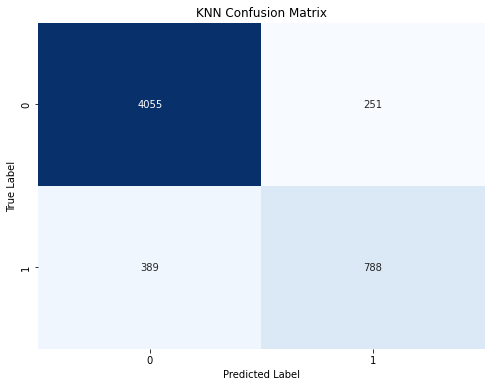

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Make predictions with KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Display classification report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

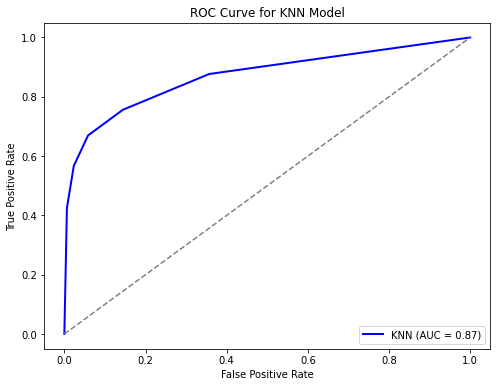

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class (class 1) using KNN
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4306
           1       0.64      0.65      0.64      1177

    accuracy                           0.85      5483
   macro avg       0.77      0.78      0.77      5483
weighted avg       0.85      0.85      0.85      5483



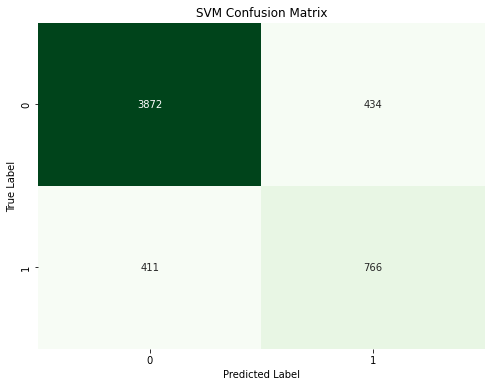

In [35]:
# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Display classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

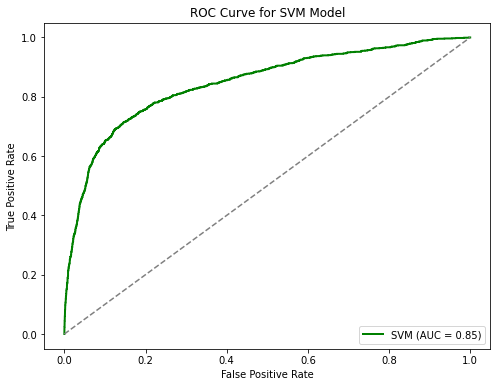

In [36]:
# Calculate the decision function scores for SVM
y_scores_svm = svm_model.decision_function(X_test)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # Reduced range of neighbors
    'weights': ['uniform', 'distance']
}
# Use StratifiedKFold for better performance on imbalanced datasets
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Grid Search for KNN
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores for parallel computation
    verbose=1   # Display progress
)
print("\nRunning GridSearchCV for KNN...")
knn_grid_search.fit(X, y)


Running GridSearchCV for KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [38]:
print("\nBest parameters for KNN:", knn_grid_search.best_params_)
print("Best cross-validation accuracy for KNN:", knn_grid_search.best_score_)


Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.8464709100857195
